# Importing important libraries

# Docstring
## def add(x):
   ##  '''
   ## add stuff here
   ### '''

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math

# Data importation

In [35]:
review = pd.read_csv('Amazon Review.csv')

/Users/pan-atlantic/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [36]:
review.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [37]:
print('Shape of data ==>', review.shape)

Shape of data ==> (34660, 21)


In [38]:
review.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

### Important columns
+ name
+ reviews.text
+ reviews.doRecommend
+ reviews.numHelpful


In [39]:
review = review[['name','reviews.text','reviews.doRecommend','reviews.numHelpful']]
print('Shape of data ==>', review.shape)
review.head()

Shape of data ==> (34660, 4)


,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


# Data preprocessing

In [40]:
review.isnull()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
34655,True,False,True,True
34656,True,False,True,True
34657,True,False,True,True
34658,True,False,True,True


In [41]:
review.isnull().sum()

name                   6760
reviews.text              1
reviews.doRecommend     594
reviews.numHelpful      529
dtype: int64

In [42]:
review.dropna(inplace=True)
review.isnull().sum()
# axis=0, drop row, axis =1, drop column

name                   0
reviews.text           0
reviews.doRecommend    0
reviews.numHelpful     0
dtype: int64

### We’ll only be considering those products that have at least 500 reviews. 

## Lamda can be called one line function and anonymous input

In [43]:
review = review.groupby('name').filter(lambda x: len(x)>500)
review.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,True,0.0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,True,0.0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,True,0.0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,True,0.0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,True,0.0


### Finding unique products

In [44]:
review['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

In [45]:
len(review['name'].unique())

8

### Converting `reviews.doRecommend` and `reviews.numHelpful` to integers

In [46]:
review['reviews.doRecommend'] = review['reviews.doRecommend'].astype(int)
review['reviews.numHelpful'] = review['reviews.numHelpful'].astype(int)

In [47]:
review.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I've had my Fire HD 8 two weeks now and I love...,1,0
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0


## Text Data Cleaning

In [48]:
review['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,,',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White),,,\r\nEcho (White),,,',
       'Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,'], dtype=object)

### Some product names contain repeating names separated by three consecutive commas (,,,). 

In [49]:
review['name'] = review['name'].apply(lambda x: x.split(',,,')[0])
review['name'].unique()

array(['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta',
       'Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta',
       'Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue',
       'Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case',
       'Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black',
       'Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,',
       'Echo (White)', 'Amazon Fire Tv'], dtype=object)

In [50]:
x = 'charles'
x.split('r')

['cha', 'les']

### Cleaning reviews.text

In [51]:
for index, text in enumerate(review['reviews.text'][35:40]):
    print('Review {}\n {}'.format(index+1, text))

Review 1
 I love everything about this tablet! The imaging is sharp and clear. It's fast and light weight. Love it!
Review 2
 Overall a nice product for traveling purposes Value for money
Review 3
 My children love this table great quality of pictures, excellent camera
Review 4
 I bought 3 tablets and my family was not disappointed.
Review 5
 Great tablet fast screen good size never gives me problem


In [52]:
x = 5
y =6

print('Your name is ',x, 'and my is',y)
print('your name {} and {}'.format(x,y))

Your name is  5 and my is 6
your name 5 and 6


**Here, you can see that we have some contractions like “It’s”, numbers like “3” and punctuations like “,”, “!” and “.” present in the reviews.**

In [53]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

### Compile the contactions with re.compile

In [54]:
contractions_re = re.compile('({})'.format('|'.join(contractions_dict.keys())))
contractions_re

re.compile(r"(ain't|'s|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|how'd|how'd'y|how'll|I'd|I'd've|I'll|I'll've|I'm|I've|isn't|it'd|it'd've|it'll|it'll've|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|should've|shouldn't|shouldn't've|so've|that'd|that'd've|there'd|there'd've|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what've|when've|where'd|where've|who'll|who'll've|who've|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)",
re.UNICODE)

## Expand contractions

In [55]:
#Function for expanding contractions
def expand_contractions(text, contractions_dict = contractions_dict):
    
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [56]:
review['reviews.text']= review['reviews.text'].apply(lambda x: expand_contractions(x))

## Converting the reviews to lowercase

In [57]:
review['cleaned'] = review['reviews.text'].apply(lambda x: x.lower())

In [58]:
review

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,this product so far has not disappointed. my c...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great for beginner or experienced person. boug...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,i have had my fire hd 8 two weeks now and i lo...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,i bought this for my grand daughter when she c...
...,...,...,...,...,...
27874,Amazon Fire Tv,"It has many uses. You can listen to music, che...",1,0,"it has many uses. you can listen to music, che..."
27875,Amazon Fire Tv,"Cost is not outrageous. Easy setup, fun to use...",1,0,"cost is not outrageous. easy setup, fun to use..."
27876,Amazon Fire Tv,I knew about this from its crowd funding start...,1,1,i knew about this from its crowd funding start...
27877,Amazon Fire Tv,This is a neat product but did not fit my need...,0,0,this is a neat product but did not fit my need...


# Remove digits and words containing digits


In [59]:
review['cleaned'] = review['cleaned'].apply(lambda x: re.sub('\w*\d\w  ','',x))
review.head()

,name,reviews.text,reviews.doRecommend,reviews.numHelpful,cleaned
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",This product so far has not disappointed. My c...,1,0,this product so far has not disappointed. my c...
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",great for beginner or experienced person. Boug...,1,0,great for beginner or experienced person. boug...
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Inexpensive tablet for him to use and learn on...,1,0,inexpensive tablet for him to use and learn on...
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I have had my Fire HD 8 two weeks now and I lo...,1,0,i have had my fire hd 8 two weeks now and i lo...
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",I bought this for my grand daughter when she c...,1,0,i bought this for my grand daughter when she c...


# Remove Punctuations


In [60]:
review['cleaned'] = review['cleaned'].apply(lambda x: re.sub('[{}]'.format(re.escape(string.punctuation)), ' ',x))
review['cleaned']

0        this product so far has not disappointed  my c...
1        great for beginner or experienced person  boug...
2        inexpensive tablet for him to use and learn on...
3        i have had my fire hd 8 two weeks now and i lo...
4        i bought this for my grand daughter when she c...
                               ...                        
27874    it has many uses  you can listen to music  che...
27875    cost is not outrageous  easy setup  fun to use...
27876    i knew about this from its crowd funding start...
27877    this is a neat product but did not fit my need...
27878    responses well and there are lots of skills to...
Name: cleaned, Length: 26068, dtype: object

In [61]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [62]:
re.escape(string.punctuation)

'!"\\#\\$%\\&\'\\(\\)\\*\\+,\\-\\./:;<=>\\?@\\[\\\\\\]\\^_`\\{\\|\\}\\~'

In [63]:
## to strip all white phases
##x.strip()

In [64]:
review['cleaned'] = review['cleaned'].apply(lambda x: re.sub('\s+',' ', x))
review['cleaned']

0        this product so far has not disappointed my ch...
1        great for beginner or experienced person bough...
2        inexpensive tablet for him to use and learn on...
3        i have had my fire hd 8 two weeks now and i lo...
4        i bought this for my grand daughter when she c...
                               ...                        
27874    it has many uses you can listen to music check...
27875    cost is not outrageous easy setup fun to use a...
27876    i knew about this from its crowd funding start...
27877    this is a neat product but did not fit my need...
27878    responses well and there are lots of skills to...
Name: cleaned, Length: 26068, dtype: object

In [65]:
for index, text in enumerate(review['cleaned'][35:40]):
    print('Review {}\n {}'.format(index+1, text))

Review 1
 i love everything about this tablet the imaging is sharp and clear it is fast and light weight love it 
Review 2
 overall a nice product for traveling purposes value for money
Review 3
 my children love this table great quality of pictures excellent camera
Review 4
 i bought 3 tablets and my family was not disappointed 
Review 5
 great tablet fast screen good size never gives me problem


# Document term matrix

- Stopwords Removal
- Lemmatization
- Create Document Term Matrix


In [66]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [67]:
review['cleaned'] = review['cleaned'].apply(lambda x: " ".join(token.lemma_ for token in nlp(x) if not token.is_stop))

In [68]:
review_grouped = review[['name','cleaned']].groupby('name').sum()

In [74]:
review_grouped

,cleaned
name,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",product far disappoint child love use like abi...
Amazon Fire Tv,echo learn everyday use daily use place speake...
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,nice little set slow wish investigate little j...
Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,good value money hand work perfectlypurchase d...
Echo (White),compete ipad high end android tablet easily ou...
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",tablet light stream use stream movie ligher ip...
"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta",sale people nice knowledgeable comegreat produ...
"Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,",well original kindle light easy read old kindl...


In [69]:
from spacy.lang.en.stop_words import STOP_WORDS
print(STOP_WORDS)

{'afterwards', 'hereupon', 'from', 'because', 'anywhere', 'together', 'everyone', 'toward', 'besides', 'along', 'here', 'itself', 'due', 'top', 'only', 'almost', 'how', 'once', 'often', 'various', 'ourselves', 'three', 'not', 'sometime', 'has', 'you', 'him', 'wherever', 'into', 'so', 'regarding', 'make', 'thence', 'we', 'and', 'first', 'after', 'no', 'would', 'whereafter', 'alone', 'towards', 'neither', 'although', 'even', 'whereupon', 'all', 'too', 'until', 'be', 'hereafter', 'further', 'enough', 'below', 'except', 'ours', 'who', 'about', '’re', 'wherein', 'last', 'very', 'seem', 'mine', 'can', 'therefore', 'also', "'ll", 'himself', 'at', 'forty', 'four', 'an', 'bottom', 'her', 'nevertheless', '’m', 'upon', 'namely', 'nor', 'i', 'now', 'above', 'before', 'else', 'twelve', '’s', 'nowhere', 'both', 'using', 'anything', 'within', 'did', 'hundred', 'why', 'may', 'well', 'each', 'have', 'moreover', 'own', '‘m', 'it', 'those', 'already', 'always', 'otherwise', '’ve', 'still', 'n’t', 'same',

## Creating a document term matrix

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(review_grouped['cleaned'])
df = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df.index = review_grouped.index
df.head(3)

,00,000,000work,0050,00good,00love,00return,01,05,06,...,zero,zigbee,zinio,zip,zippy,zone,zoo,zoom,zooming,zwave
name,,,,,,,,,,,,,,,,,,,,,
"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",7,1,0,0,0,0,0,1,0,0,...,4,0,1,0,0,0,0,0,0,0
Amazon Fire Tv,3,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,1,0,0,0,0,0,0,0,0,1,...,4,0,0,0,0,2,0,2,0,0


## Generate wordcloud

In [71]:
from wordcloud import WordCloud
from textwrap import wrap

def generate_wordcloud(data,title):
    wc = WordCloud(width = 400, height = 330, max_words = 150, colormap='Dark2').generate_from_frequencies(data)
    plt.figure(figsize = (10,8))
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title, 60)), fontsize = 13)
    plt.show()



## Transposing the document term matrix

In [72]:
df_dtm = df.transpose()
df_dtm

name,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",Amazon Fire Tv,Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,Echo (White),"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case","Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta","Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers,"
00,7,3,1,2,7,1,41,1
000,1,1,0,0,0,0,1,0
000work,0,0,0,0,1,0,0,0
0050,0,0,0,0,0,0,1,0
00good,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
zone,0,0,2,0,2,1,2,0
zoo,0,0,0,0,0,0,1,0
zoom,0,0,2,0,0,0,4,0
zooming,0,0,0,0,0,0,1,0


## ploting wordcloud for each product

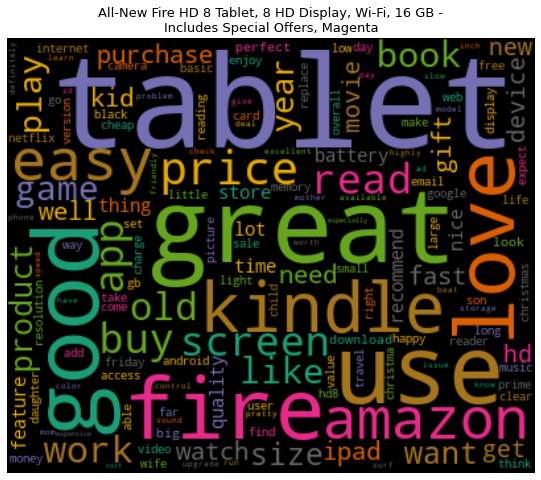

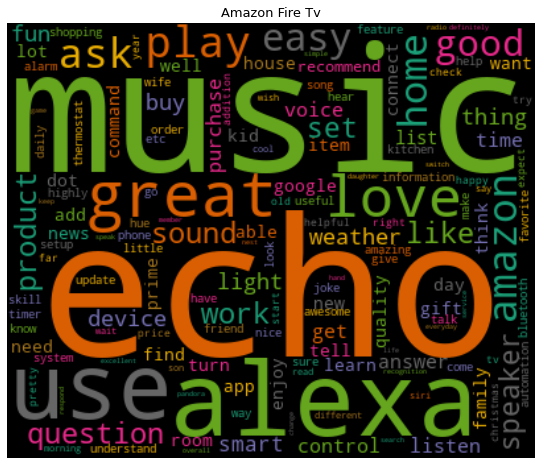

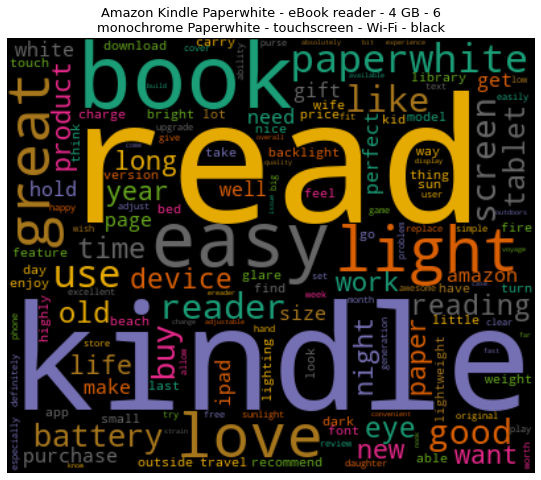

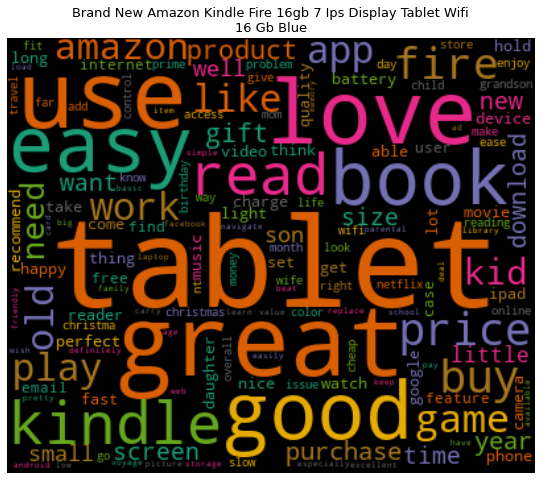

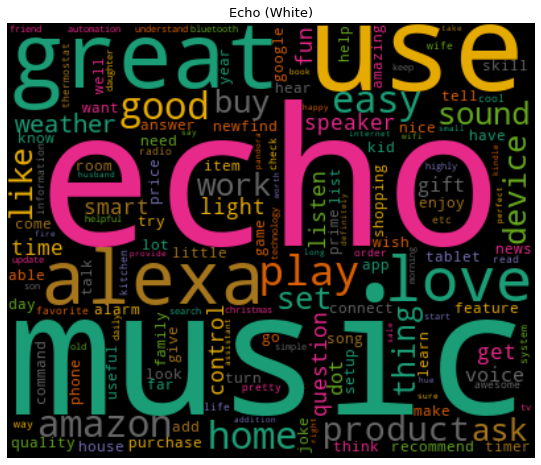

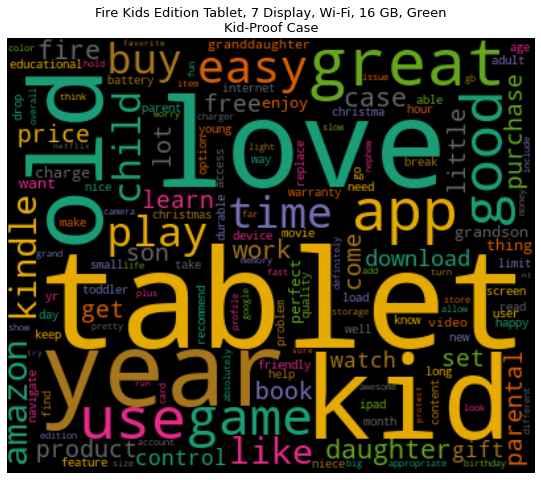

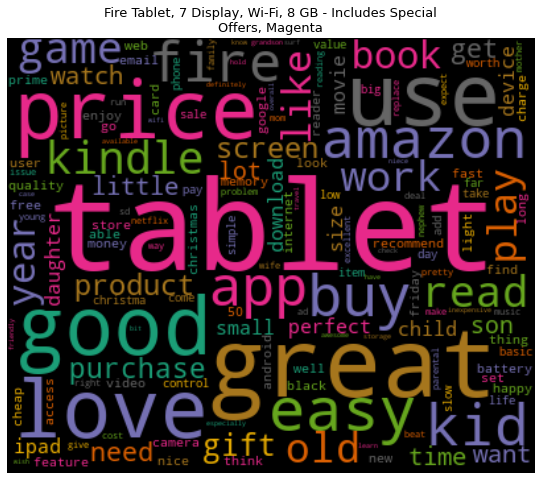

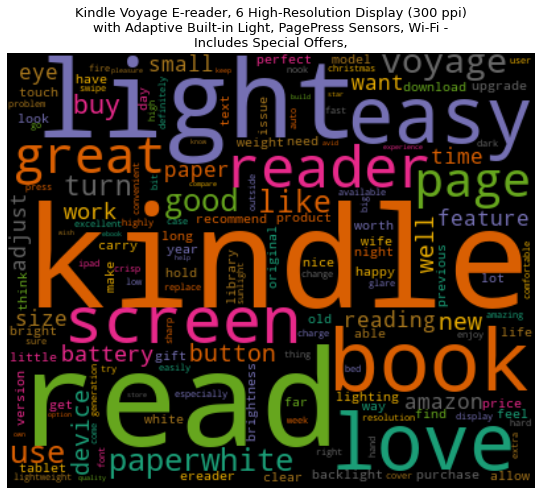

In [73]:
for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False), product)   